In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
import re
import seaborn as sns

# Gathering

In [5]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [6]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [ ]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)

In [7]:
#reding tweet_json.txt file 
tweet_json = pd.read_json('tweet-json.txt', lines=True)



In [8]:
tweet_json.columns


Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [9]:
tweet_json.shape

(2354, 31)

In [10]:
tweet_json = tweet_json.loc[:,['id','favorite_count','retweet_count']]

# Assesment 

In [11]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
790,773922284943896577,NaN,NaN,2016-09-08 16:33:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Heinrich (pronounced ""Pat""). He's a Bo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/773922284...,12,10,Heinrich,None,None,None,None
532,808001312164028416,NaN,NaN,2016-12-11 17:31:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He likes to stick his tongue o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,None,None,None,None
1918,674271431610523648,NaN,NaN,2015-12-08 16:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""AT DAWN, WE RIDE""\n10/10 for both dogs https:...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/674271431...,10,10,None,None,None,None,None
911,757597904299253760,NaN,NaN,2016-07-25 15:26:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @jon_hill987: @dog_rates There is a cunning...,7.575971e+17,280479778.0,2016-07-25 15:23:28 +0000,https://twitter.com/jon_hill987/status/7575971...,11,10,None,None,None,pupper,None
463,817423860136083457,NaN,NaN,2017-01-06 17:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ken. His cheeks are magic. 13/10 (IG: ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None


In [12]:
twitter_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [13]:
twitter_archive[twitter_archive.eq(1776).any(1)]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [14]:
twitter_archive[twitter_archive['rating_numerator'] == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [15]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_prediction['p3_conf'].describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [17]:
sum(twitter_archive['tweet_id'].duplicated())


0

In [18]:
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [19]:
sum(tweet_json['id'].duplicated())

0

In [20]:
tweet_json['favorite_count'].describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [23]:
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]
            

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [24]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_prediction[(image_prediction['p1_dog']==False) & (image_prediction['p2_dog']==False) & (image_prediction['p3_dog']==False)]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [26]:
print(len(image_prediction[image_prediction['p1_dog']==True]))
print(len(image_prediction[image_prediction['p2_dog']==True]))
print(len(image_prediction[image_prediction['p3_dog']==True]))


1532
1553
1499


In [27]:

twitter_archive[twitter_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [28]:
tweet_json[tweet_json.duplicated()]

,id,favorite_count,retweet_count


In [29]:
sum(image_prediction.jpg_url.duplicated())

66

### qualities
    #### in `twitter archive.csv`
    * retweets must be dropped
    * replies must be dropped
    * tweets without images must be dropped 
    * numerator and denominator msut be floats
    * invalid denominators like (0,15,70,7,11,150,11,170,50,80,90,etc..)
    * time stamp must changed its's to datetime64
    * tweet_id better cahnged to object as it's not used to make calculations  
    * missing values in name cloumn
    * missing info in doggo	floofer	pupper	puppo cloumns
    #### in `image_prediction.tsv `
    * some of p1,p2 and p3 values begins with upper case letter while the rest besgins with lowercased letter. 
    * 66 duplicate in jpg_url cloumn


### tideness
* three tables must gathered together in one table 
##### in ` twitter_archive.csv` 
* table columns (doggo	floofer	pupper	puppo) must tided into one column 
* rating(numerator and denominator) must tided into one cloumn called "rating"


# clean

In [30]:
#make a copy of each table
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

In [31]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### define
drop rows with missing values in expanded_urls cloumn in `twitter_archive.csv` 

### code 

In [32]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(image_pred_clean.tweet_id.unique())

# checking if tweets with images exist in the twitter_archive 
len(tweets_with_image) == twitter_archive_clean.tweet_id.isin(tweets_with_image).sum()

# Cleaning 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(tweets_with_image)]

In [33]:
# extract the tweets that include data in the retweet_status_id.
retweet_entries = twitter_archive_clean.retweeted_status_id.notnull()
twitter_archive_clean[retweet_entries].shape[0]

81

In [34]:
# Dropping the retweets from twitter_archive
twitter_archive_clean = twitter_archive_clean[~retweet_entries]

In [35]:
# extract the tweets that include data in the in_reply_to_status_id 
replies_entries = twitter_archive_clean.in_reply_to_status_id.notnull()
twitter_archive_clean[replies_entries].shape[0]

23

In [36]:
# Dropping the replies from twitter_archive
twitter_archive_clean = twitter_archive_clean[~replies_entries]

In [37]:
# check the image_prediction table for extra tweet ids not in the archive table
np.logical_not(image_pred_clean.tweet_id.isin(list(twitter_archive_clean.tweet_id)))

# Dropping the retweets and replies ids from the image prediction dataframe
image_pred_clean[~np.logical_not(image_pred_clean.tweet_id.isin(list(twitter_archive_clean.tweet_id)))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
dtypes: float64(4), int64(3), object(10)

### define
correcring "not 10" denomirators 

### code

In [39]:
#  all scores with a denominator of 10.
df_rating=[]
pattern = re.compile(r'\d+\/10')
for text in twitter_archive_clean.text:
    string=text
    rate=pattern.findall(string)
    df_rating.append(rate)


In [40]:

twitter_archive_clean['rating']=df_rating


In [41]:
#  into str, there are two types of classification & connection
twitter_archive_clean['rating']=twitter_archive_clean['rating'].apply(lambda x:'&'.join(x) if len(x)>1 else ''.join(x))


In [42]:
# Replace the missing value with np.nan
twitter_archive_clean['rating']=twitter_archive_clean['rating'].replace('',np.nan)


In [43]:
#  drop unnesceary cloumns
twitter_archive_clean.drop(twitter_archive_clean[['rating_numerator','rating_denominator']],axis=1,inplace=True)


In [44]:
#View Results
twitter_archive_clean['rating'].value_counts()


12/10               445
10/10               407
11/10               390
13/10               254
9/10                149
8/10                 93
7/10                 50
14/10                34
6/10                 32
5/10                 31
3/10                 19
4/10                 14
2/10                  9
1/10                  4
10/10&7/10            3
10/10&4/10            2
11/10&8/10            2
10/10&8/10            1
10/10&6/10            1
9/10&2/10             1
75/10                 1
12/10&11/10           1
10/10&10/10           1
5/10&8/10             1
0/10                  1
27/10                 1
4/10&13/10            1
11/10&10/10           1
1776/10               1
10/10&5/10            1
7/10&8/10             1
8/10&1/10             1
8/10&11/10            1
10/10&11/10           1
5/10&10/10            1
26/10                 1
10/10&7/10&12/10      1
420/10                1
Name: rating, dtype: int64

In [45]:
#View text content with more than 2 digits or multiple ratings
twitter_archive_clean.text[twitter_archive_clean['rating'].str.len()>6]


766     "Yep... just as I suspected. You're not flossi...
979     This is Atticus. He's quite simply America af....
1007    This is Bookstore and Seaweed. Bookstore is ti...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1359    This is Socks. That water pup w the super legs...
1459    This may be the greatest video I've ever been ...
1465    Meet Oliviér. He takes killer selfies. Has a d...
1508    When bae says they can't go out but you see th...
1525    This is Eriq. His friend just reminded him of ...
1538    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1795    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1832    These two pups just met and have instantly bon...
1897    Meet Rufio. He is unaware of the pink legless ...
1901    Two gorgeous dogs here. Little waddling dog is...
1970    Meet Eve. She's a raging alcoholic 8/10 (would...
2010    10/10 for dog. 7/10 for cat. 12/10 for human. ...
2064    Meet Holly. She's trying to teach small human-...
2113    Meet H

In [46]:
sum(twitter_archive_clean['rating'].str.len()>6)


23

In [47]:
#creat dic for the unfixed part
dic={766:'12/10',1359:'9/10',1459:'4/10',1508:'5/10',1525:'10/10',1897:'10/10',1970:'8/10',2010:'10/10',2064:'8/10',2216:'8/10',2263:'4/10'}


In [48]:
for (key,value) in dic.items():
    twitter_archive_clean.loc[key,'rating']=value


In [49]:
#View Results
sum(twitter_archive_clean['rating'].str.len()>6)+11


23

### define 
drop unnesecsary columns

### code

In [50]:
#drop unnesecsary columns
twitter_archive_clean = twitter_archive_clean.drop('in_reply_to_status_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('in_reply_to_user_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)


### test

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         1971 non-null int64
timestamp        1971 non-null object
source           1971 non-null object
text             1971 non-null object
expanded_urls    1971 non-null object
name             1971 non-null object
doggo            1971 non-null object
floofer          1971 non-null object
pupper           1971 non-null object
puppo            1971 non-null object
rating           1959 non-null object
dtypes: int64(1), object(10)
memory usage: 264.8+ KB


### define
replace none with Nan in `doggo	floofer	pupper	puppo` in `twitter_archive.csv` and tide the columns "doggo	floofer	pupper	puppo" by adding, then drop unnecessary cloumn 

### code

In [52]:
#replacing none with Nan
twitter_archive_clean.doggo = twitter_archive_clean.doggo.str.replace('None' ,'')
twitter_archive_clean.floofer = twitter_archive_clean.floofer.str.replace('None' ,'')
twitter_archive_clean.pupper = twitter_archive_clean.pupper.str.replace('None' ,'')
twitter_archive_clean.puppo = twitter_archive_clean.puppo.str.replace('None' ,'')
#add the four cloumns
twitter_archive_clean['dog_breed'] = twitter_archive_clean['doggo'] + twitter_archive_clean['puppo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper']

In [53]:
#drop unnescessary columns
twitter_archive_clean = twitter_archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'] )

### test

In [54]:
twitter_archive_clean[twitter_archive_clean['dog_breed'].notnull()]

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12/10,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13/10,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12/10,
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,13/10,
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,13/10,
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,13/10,
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,13/10,
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,14/10,doggo


### define 

### define 
Extract pet name information from text

### code

In [55]:
#extract from text column
twitter_archive_clean['name'] = twitter_archive_clean.text.str.findall('(?:This is|named|Meet|Say hello to|name is|Here we have|Here is)\s([A-Z][^\s.,]*)')


In [56]:
#  into str, there are two kinds of names, connect
twitter_archive_clean['name'] = twitter_archive_clean['name'].apply(lambda x: ','.join(set(x)))


In [57]:
#replace none with Nan
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('None' ,'')


In [58]:
#test result
twitter_archive_clean['name'].value_counts()


              591
Charlie        11
Cooper         10
Oliver         10
Lucy           10
Tucker          9
Penny           9
Winston         8
Sadie           8
Lola            7
Toby            7
Daisy           7
Stanley         6
Bo              6
Koda            6
Jax             6
Bella           6
Scout           5
Leo             5
Louis           5
Bailey          5
Buddy           5
Chester         5
Milo            5
Oscar           5
Zoey            5
Dave            5
Rusty           5
Oakley          4
Clark           4
             ... 
Amélie          1
Barney          1
Longfellow      1
Holly           1
Clybe           1
Barclay         1
Adele           1
Aqua            1
Jordy           1
Skye            1
Maddie          1
Kaiya           1
Flurpson        1
Pip             1
Sabertooth      1
Fred-Rick       1
Mark            1
Rodman          1
Cilantro        1
Beckham         1
Trigger         1
Clyde           1
Shadoe          1
Edmund          1
Logan     

### test

In [59]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12/10,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13/10,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12/10,


### define
* change timestamp type
* change tweet_id type

### code

In [60]:
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])

In [61]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

In [62]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         1971 non-null object
timestamp        1971 non-null datetime64[ns]
source           1971 non-null object
text             1971 non-null object
expanded_urls    1971 non-null object
name             1971 non-null object
rating           1959 non-null object
dog_breed        1971 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 218.6+ KB


### define 
#### in  `image_predection.tsv` table  
* lowercase all records in p1,p2 and p3 cloumns 
* change tweet_id type 
* drop jpg_url duplicates

### code

In [63]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [64]:
image_pred_clean['p1']=image_pred_clean['p1'].str.lower()
image_pred_clean['p2']=image_pred_clean['p2'].str.lower()
image_pred_clean['p3']=image_pred_clean['p3'].str.lower()

In [65]:
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)

### test

In [66]:
# drop duplicates
image_pred_clean=image_pred_clean[~image_pred_clean.jpg_url.duplicated()]


In [67]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


## tweet_json
* change tweet_id type 
* renaming id column in tweet_json

In [68]:
tweet_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

In [69]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(str)

#### combine three tables

In [70]:
df_clean = twitter_archive_clean.merge(image_pred_clean,how='inner',on='tweet_id').merge(tweet_json_clean,how='left',on='tweet_id')


In [71]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_breed,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12/10,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13/10,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12/10,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,41048,9774


In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id          1971 non-null object
timestamp         1971 non-null datetime64[ns]
source            1971 non-null object
text              1971 non-null object
expanded_urls     1971 non-null object
name              1971 non-null object
rating            1959 non-null object
dog_breed         1971 non-null object
jpg_url           1971 non-null object
img_num           1971 non-null int64
p1                1971 non-null object
p1_conf           1971 non-null float64
p1_dog            1971 non-null bool
p2                1971 non-null object
p2_conf           1971 non-null float64
p2_dog            1971 non-null bool
p3                1971 non-null object
p3_conf           1971 non-null float64
p3_dog            1971 non-null bool
favorite_count    1971 non-null int64
retweet_count     1971 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(3), int64(3), object(11)
mem

## store result in twitter_archive_master

In [73]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

In [74]:
#read csv file
df = pd.read_csv('twitter_archive_master.csv')

In [75]:
#remove the line to allow making stastics
df=df[df.rating.notnull()]
df['rating_numerator']=df['rating'].astype(str).apply(lambda x:x.split('/')[0])
df['rating_numerator']=df['rating_numerator'].astype(int)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id            1959 non-null int64
timestamp           1959 non-null object
source              1959 non-null object
text                1959 non-null object
expanded_urls       1959 non-null object
name                1379 non-null object
rating              1959 non-null object
dog_breed           303 non-null object
jpg_url             1959 non-null object
img_num             1959 non-null int64
p1                  1959 non-null object
p1_conf             1959 non-null float64
p1_dog              1959 non-null bool
p2                  1959 non-null object
p2_conf             1959 non-null float64
p2_dog              1959 non-null bool
p3                  1959 non-null object
p3_conf             1959 non-null float64
p3_dog              1959 non-null bool
favorite_count      1959 non-null int64
retweet_count       1959 non-null int64
rating_numerator    1959 non-null int64


# analyzing

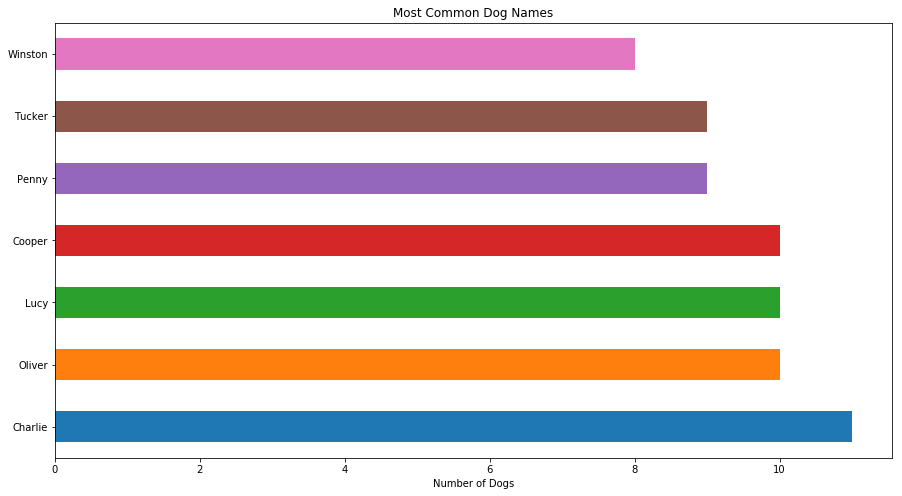

In [77]:
name_count = df.name.value_counts()
name_count[0:7].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

In [78]:
df.name.value_counts()


Charlie       11
Oliver        10
Lucy          10
Cooper        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Daisy          7
Lola           7
Toby           7
Jax            6
Bo             6
Bella          6
Koda           6
Stanley        6
Louis          5
Buddy          5
Oscar          5
Zoey           5
Milo           5
Rusty          5
Leo            5
Chester        5
Bailey         5
Dave           5
Scout          5
Cassie         4
Clarence       4
Dexter         4
              ..
Timofy         1
Dale           1
Ole            1
Laela          1
Clyde          1
Beckham        1
Alfy           1
Cilantro       1
Gromit         1
Lolo           1
Kip            1
BeBe           1
Chaz           1
Kallie         1
Jaycob         1
Leroi          1
Andy           1
Lillie         1
Adele          1
Jordy          1
Skye           1
Maddie         1
Kaiya          1
Flurpson       1
Pip            1
Sabertooth     1
Fred-Rick      1
Mark          

charlie is the most common name 

In [79]:
df.rating_numerator

0       13
1       13
2       12
3       13
4       12
5       13
6       13
7       13
8       13
9       14
10      13
11      13
12      13
13      12
14      13
15      13
16      12
17      13
18      13
19      12
20      13
21      14
22      13
23      13
24      12
25      13
26      13
27      13
28      12
29      13
        ..
1941     2
1942     7
1943     9
1944    11
1945     6
1946     8
1947    10
1948     9
1949     3
1950     9
1951    11
1952    10
1953     1
1954    11
1955     8
1956     9
1957     6
1958    10
1959     9
1960    10
1961     8
1962     9
1963    10
1964     2
1965    10
1966     5
1967     6
1968     9
1969     7
1970     8
Name: rating_numerator, Length: 1959, dtype: int64

In [80]:
# extract p1,p2 and p3 to create dog_type dataframe
type_df = df.loc[:, ['p1', 'p2', 'p3', 'rating_numerator', 'favorite_count']]


In [81]:
type_df.head()

,p1,p2,p3,rating_numerator,favorite_count
0,orange,bagel,banana,13,39467
1,chihuahua,pekinese,papillon,13,33819
2,chihuahua,malamute,kelpie,12,25461
3,paper_towel,labrador_retriever,spatula,13,42908
4,basset,english_springer,german_short-haired_pointer,12,41048


In [82]:
#  usr melt function to identify rating and favourite count for each dog type
formatted_df = pd.melt(type_df,
                       ['rating_numerator', 'favorite_count'], 
                       var_name="predection",
                       value_name="dog_type")
formatted_df = formatted_df.sort_values(by=['dog_type'])
formatted_df.head(100)

,rating_numerator,favorite_count,predection,dog_type
5270,10,1598,p3,abaya
5555,11,3693,p3,abaya
2182,12,21029,p2,academic_gown
3643,420,7989,p2,accordion
5831,2,800,p3,acorn
324,11,14916,p1,acorn_squash
1523,9,1198,p1,acorn_squash
4670,10,5094,p3,affenpinscher
3163,9,3624,p2,affenpinscher
204,13,17305,p1,afghan_hound


In [83]:
formatted_df.dog_type.value_counts()

labrador_retriever                261
golden_retriever                  259
chihuahua                         177
pembroke                          138
cardigan                          113
pomeranian                        103
toy_poodle                        102
pug                                91
chow                               90
french_bulldog                     90
chesapeake_bay_retriever           87
cocker_spaniel                     86
eskimo_dog                         81
beagle                             73
siberian_husky                     72
kuvasz                             68
staffordshire_bullterrier          66
malamute                           66
samoyed                            63
pekinese                           62
kelpie                             59
american_staffordshire_terrier     55
miniature_pinscher                 55
great_pyrenees                     52
miniature_poodle                   52
collie                             49
italian_grey

In [84]:
# assign a variable each dog type for it's columns  
labrador_retriever = formatted_df[formatted_df['dog_type'] == 'labrador_retriever']
golden_retriever = formatted_df[formatted_df['dog_type'] == 'golden_retriever'] 
chihuahua = formatted_df[formatted_df['dog_type'] == 'chihuahua'] 
pembroke  = formatted_df[formatted_df['dog_type'] == 'pembroke'] 
cardigan = formatted_df[formatted_df['dog_type'] == 'cardigan'] 
pomeranian =formatted_df[formatted_df['dog_type'] == 'pomeranian'] 
toy_poodle = formatted_df[formatted_df['dog_type'] == 'toy_poodle'] 

In [85]:
labrador_retriever['rating_numerator'].describe()

count    261.000000
mean      11.333333
std        1.457078
min        5.000000
25%       10.000000
50%       12.000000
75%       12.000000
max       14.000000
Name: rating_numerator, dtype: float64

In [86]:
golden_retriever['rating_numerator'].describe()

count    259.000000
mean      11.444015
std        1.378037
min        5.000000
25%       11.000000
50%       12.000000
75%       12.000000
max       14.000000
Name: rating_numerator, dtype: float64

In [87]:
chihuahua['rating_numerator'].describe()  

count    177.000000
mean      10.553672
std        2.152879
min        3.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       14.000000
Name: rating_numerator, dtype: float64

In [88]:
pembroke['rating_numerator'].describe()

count    138.000000
mean      11.398551
std        1.693870
min        4.000000
25%       11.000000
50%       12.000000
75%       12.000000
max       14.000000
Name: rating_numerator, dtype: float64

In [89]:
cardigan['rating_numerator'].describe()

count    113.000000
mean      11.398230
std        1.491283
min        6.000000
25%       11.000000
50%       12.000000
75%       12.000000
max       14.000000
Name: rating_numerator, dtype: float64

In [90]:
pomeranian['rating_numerator'].describe()

count    103.000000
mean      11.805825
std        6.495939
min        4.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       75.000000
Name: rating_numerator, dtype: float64

In [91]:
toy_poodle['rating_numerator'].describe()

count    102.000000
mean      10.686275
std        1.845414
min        2.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       14.000000
Name: rating_numerator, dtype: float64

In [92]:
#removing outlier 
formatted_df = formatted_df.drop(index = 497)

In [93]:
#assign rach dog type rating mean to a var
labrador_retriever_mean = labrador_retriever['rating_numerator'].mean()
golden_retriever_mean = golden_retriever['rating_numerator'].mean()
chihuahua_mean = chihuahua['rating_numerator'].mean()
pembroke_mean = pembroke['rating_numerator'].mean()
cardigan_mean = cardigan['rating_numerator'].mean()


In [94]:
#creat a list of labels
names = ['labrador',                       
'golden',                 
'chihuahua',                         
'pembroke',                  
'cardigan',       
]

In [95]:
##creat a list of rating mean values
means = [labrador_retriever_mean,                       
golden_retriever_mean,                 
chihuahua_mean,
pembroke_mean,                  
cardigan_mean,      
    
                   ]
print(means)


[11.333333333333334, 11.444015444015443, 10.55367231638418, 11.398550724637682, 11.398230088495575]


In [96]:
#assign rach dog type fav count mean to a var
labrador_retriever_f_mean=labrador_retriever['favorite_count'].mean()
golden_retriever_f_mean=golden_retriever['favorite_count'].mean()
chihuahua_f_mean=chihuahua['favorite_count'].mean()
pembroke_f_mean=pembroke['favorite_count'].mean()
cardigan_f_mean=cardigan['favorite_count'].mean()

In [97]:
f_means = [labrador_retriever_f_mean,                       
golden_retriever_f_mean,                 
chihuahua_f_mean,
pembroke_f_mean,                  
cardigan_f_mean]
print(max(f_means))

12575.2796935


<Container object of 5 artists>

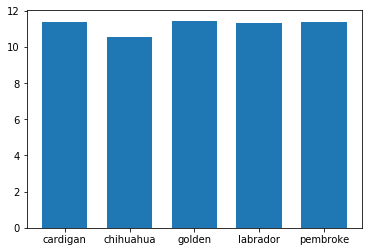

In [98]:
plt.bar(x=names, height=means,  width=0.7,  align='center', linewidth = 0.5, bottom = None)

<Container object of 5 artists>

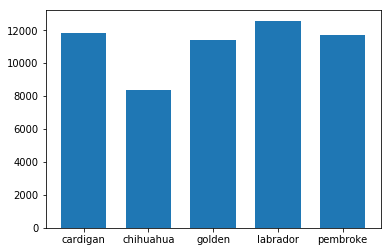

In [99]:
plt.bar(x=names, height=f_means,  width=0.7,  align='center', linewidth = 0.5, bottom = None)

* golden_retiver is most common type according to rating values
* labrador is most common according fav count

In [102]:
#new df for fav
df_favorite=df[['rating_numerator','favorite_count']]


In [103]:
#Because there is an abnormal value, select the part with the numerator less than 20 for drawing
df_favorite=df_favorite[df_favorite.rating_numerator<20]


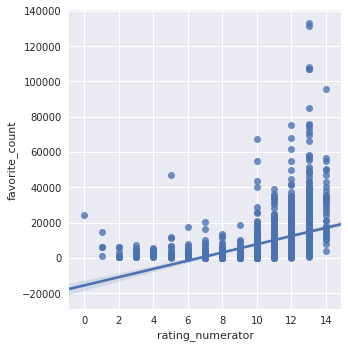

In [104]:
# visualizing
sns.set(style="darkgrid")
sns.lmplot(x='rating_numerator', y='favorite_count',data = df_favorite)
plt.show()


 people's preference for dogs is positively correlated with the dog's score
 